<a href="https://colab.research.google.com/github/syedmahmoodiagents/RAG/blob/main/RAG_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

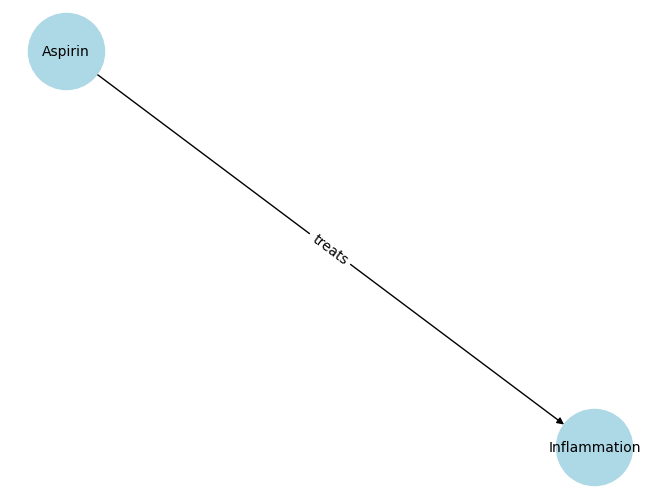

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Nodes
G.add_node("Aspirin", type="Drug")
G.add_node("Inflammation", type="Disease")

# Edge
G.add_edge("Aspirin", "Inflammation", relation="treats")

# Layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10
)

edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [6]:
from graphviz import Digraph

dot = Digraph()

dot.node("A", "Aspirin\n(Drug)")
dot.node("B", "Inflammation\n(Disease)")
dot.edge("A", "B", label="treats")


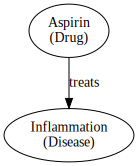

In [7]:
dot

In [14]:
from langgraph.graph import StateGraph, END

class State(dict):
    pass

def retrieve(state):
    return {"step": "retrieve"}

def rerank(state):
    return {"step": "rerank"}

def answer(state):
    return {"step": "answer"}

graph = StateGraph(State)
graph.add_node("retrieve", retrieve)
graph.add_node("rerank", rerank)
graph.add_node("answer", answer)

graph.set_entry_point("retrieve")
graph.add_edge("retrieve", "rerank")
graph.add_edge("rerank", "answer")
graph.add_edge("answer", END)

app = graph.compile()


In [16]:
!pip install IPython --q

In [17]:
from IPython.display import display, Markdown

display(Markdown(app.get_graph().draw_mermaid()))


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	retrieve(retrieve)
	rerank(rerank)
	answer(answer)
	__end__([<p>__end__</p>]):::last
	__start__ --> retrieve;
	rerank --> answer;
	retrieve --> rerank;
	answer --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc


# Display a knowledge graph built inside LangGraph nodes

In [1]:

from langgraph.graph import StateGraph, END
import networkx as nx
import matplotlib.pyplot as plt
from typing import TypedDict # Import TypedDict

In [2]:
class State(TypedDict):
    """
    State will carry:
    - query: user question
    - graph: NetworkX knowledge graph
    """
    query: str # Explicitly define query
    graph: nx.DiGraph # Explicitly define graph with its type


In [3]:
def init_graph(state: State):
    """Initialize empty knowledge graph"""
    G = nx.DiGraph()
    return {"graph": G}

In [4]:
def extract_entities(state: State):
    """Add entities to graph"""
    G = state["graph"]

    # Example entities (normally from NLP / LLM)
    G.add_node("Aspirin", type="Drug")
    G.add_node("COX-1", type="Target")
    G.add_node("Inflammation", type="Disease")

    return {"graph": G}

In [5]:
def extract_relations(state: State):
    """Add relations (edges)"""
    G = state["graph"]

    G.add_edge("Aspirin", "COX-1", relation="inhibits")
    G.add_edge("Aspirin", "Inflammation", relation="treats")

    return {"graph": G}


In [6]:
graph = StateGraph(State)

graph.add_node("init_graph", init_graph)
graph.add_node("extract_entities", extract_entities)
graph.add_node("extract_relations", extract_relations)

graph.set_entry_point("init_graph")
graph.add_edge("init_graph", "extract_entities")
graph.add_edge("extract_entities", "extract_relations")
graph.add_edge("extract_relations", END)

app = graph.compile()


final_state = app.invoke(
    {"query": "How does aspirin work?"}
)


from IPython.display import display, Markdown
display(Markdown(app.get_graph().draw_mermaid()))

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	init_graph(init_graph)
	extract_entities(extract_entities)
	extract_relations(extract_relations)
	__end__([<p>__end__</p>]):::last
	__start__ --> init_graph;
	extract_entities --> extract_relations;
	init_graph --> extract_entities;
	extract_relations --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc


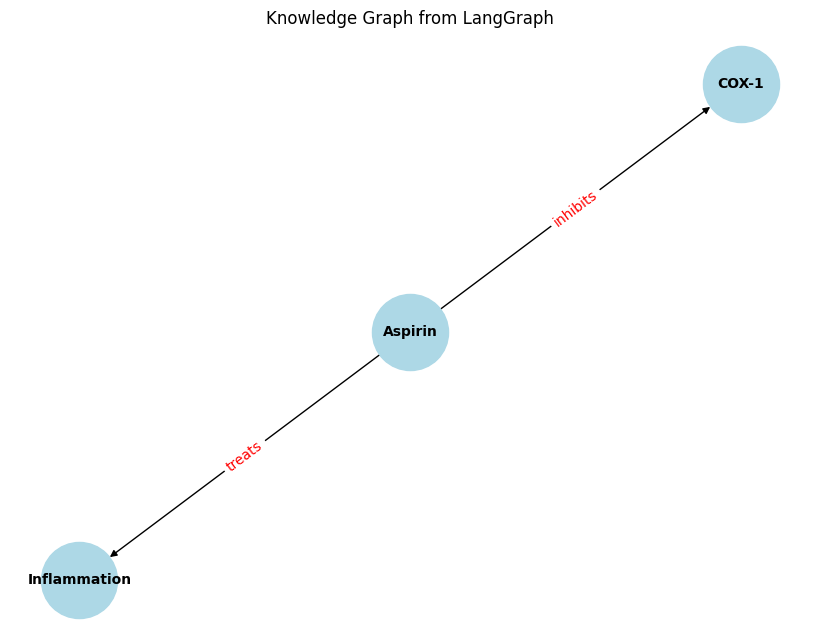

In [7]:
G = final_state["graph"]

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10,
    font_weight="bold"
)

# Draw edge labels (relations)
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_color="red"
)

plt.title("Knowledge Graph from LangGraph")
plt.show()